In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data = pd.read_csv("seattle-weather.csv")

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
#Check for null values
data.isnull().sum()
#This sumups the total null values in each column 

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
data.nunique()
#prints number of unique values 

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

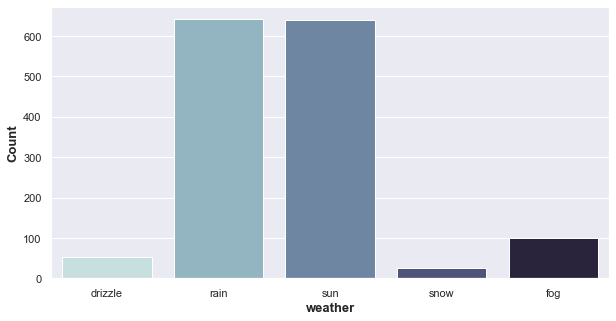

In [8]:
#ploting the number of time's each event has happen rain ,sun ,snow,fog,dizzel
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather',data = data,palette="ch:start=.2,rot=-.3")
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

In [9]:
data = data.drop('date',axis=1)

In [10]:
x = data.drop('weather',axis=1)
y = data['weather']

# Split the dataset into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 4)
(366, 4)
(1095,)
(366,)


# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Here sc is object of standardsacler class and it transforms values of infinite range to a limitting range jaisa activation function karta tha 

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)#logisitic regression model ko call kiya and ensure kiya ki no randomness
classifier.fit(X_train, y_train)#logistic main data ko train kar rahe hain 

LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
y_pred

array(['sun', 'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun',
       'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'rain', 'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun',
       'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'sun',
       'sun', 'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun',
       'sun', 'sun', 'rain', 'rain', 'rain', 'sun', 'rain

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)#ise confusion mattrix kehte hain number true positive and true negative and false positive ke plotting main help karta hain
print(cm)

[[  0   0   0   0  11]
 [  0   0   3   0  28]
 [  0   0 130   0  25]
 [  0   0   6   0   0]
 [  0   0  14   0 149]]


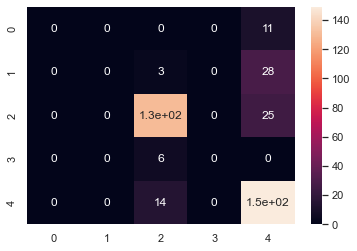

In [18]:
sns.heatmap(cm,annot=True)#heighest value heat map ki 140 hogi kunki hamra confussion mattrix heighest 140 kar rha hain
plt.show()

In [20]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")#accuracy score ko save karliya hamne 

Accuracy score: 0.7622950819672131


# Training the K-NN model on the Training set

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   1   3   0   6]
 [  1   4   5   0  21]
 [  0   3 127   0  25]
 [  0   0   3   1   2]
 [  5  17  26   0 115]]


In [28]:
acc3 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc3}")

Accuracy score: 0.6775956284153005


# Training the Naive Bayes on the Training set

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0   0   0   0  11]
 [  0   0   0   0  31]
 [  0   0 141   2  12]
 [  0   0   2   4   0]
 [  0   0   0   0 163]]


In [32]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.8415300546448088


# Training Decision Tree Classification on Train set

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
y_pred

array(['sun', 'drizzle', 'rain', 'sun', 'sun', 'rain', 'rain', 'rain',
       'sun', 'rain', 'drizzle', 'rain', 'sun', 'fog', 'drizzle', 'sun',
       'fog', 'rain', 'rain', 'rain', 'rain', 'rain', 'rain', 'sun',
       'sun', 'drizzle', 'sun', 'rain', 'drizzle', 'sun', 'rain', 'sun',
       'snow', 'rain', 'rain', 'rain', 'drizzle', 'rain', 'drizzle',
       'rain', 'sun', 'rain', 'rain', 'rain', 'sun', 'drizzle', 'sun',
       'sun', 'sun', 'sun', 'sun', 'sun', 'sun', 'rain', 'rain', 'sun',
       'sun', 'snow', 'sun', 'rain', 'sun', 'sun', 'sun', 'fog', 'fog',
       'rain', 'sun', 'fog', 'sun', 'rain', 'rain', 'snow', 'rain',
       'drizzle', 'fog', 'sun', 'rain', 'drizzle', 'rain', 'rain', 'sun',
       'sun', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain',
       'sun', 'fog', 'rain', 'fog', 'rain', 'snow', 'sun', 'drizzle',
       'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'rain',
       'rain', 'rain', 'sun', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun',
 

In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   2   1   0   7]
 [  6   8   1   0  16]
 [  0   1 140   4  10]
 [  0   0   3   3   0]
 [ 18  23   9   0 113]]


<AxesSubplot:>

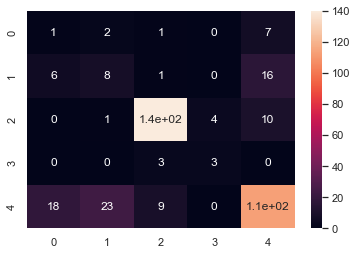

In [37]:
sns.heatmap(cm,annot=True)

In [38]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.7240437158469946


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)
RandomForestClassifier(n_estimators=40, random_state=0)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

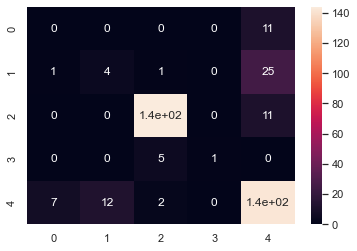

In [40]:
sns.heatmap(cm,annot=True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        11
         fog       0.25      0.13      0.17        31
        rain       0.95      0.93      0.94       155
        snow       1.00      0.17      0.29         6
         sun       0.75      0.87      0.81       163

    accuracy                           0.80       366
   macro avg       0.59      0.42      0.44       366
weighted avg       0.77      0.80      0.78       366



In [42]:
acc6 = forest.score(X_test,y_test)
print(acc6)

0.7950819672131147


# Create visualization for all model with their Accuracy

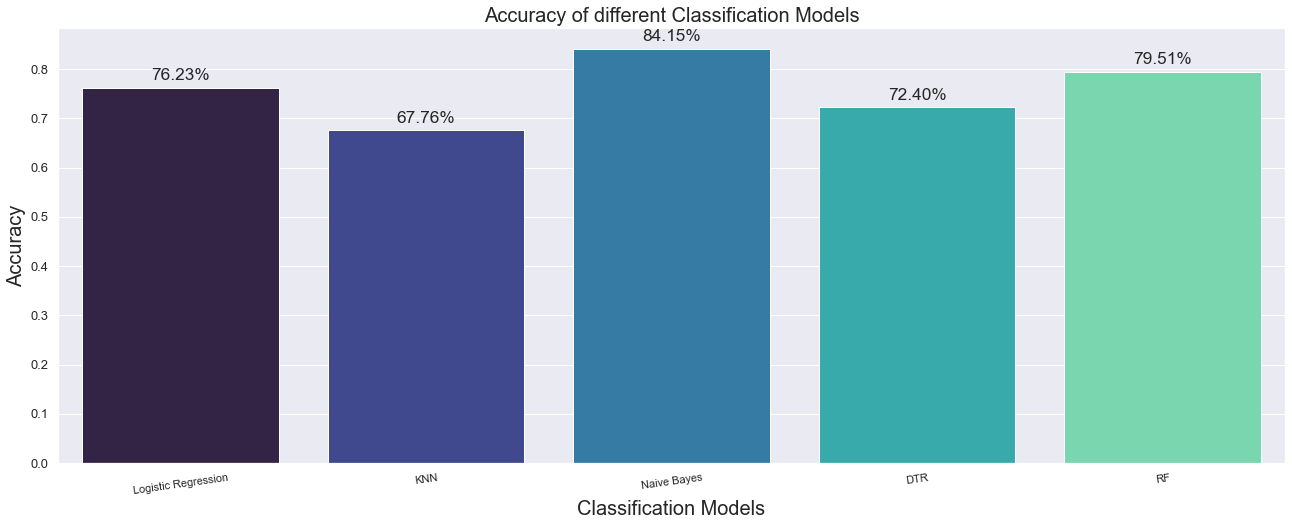

In [44]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")

mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RF")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()